<a href="https://colab.research.google.com/github/tejasvipver/Data-Science-project/blob/main/DL/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #vizualization
import matplotlib.pyplot as plt #vizualization
from matplotlib import cm

import keras

from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.utils import shuffle

# Data Loading
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()

In [ ]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
data = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Exploratory analysis

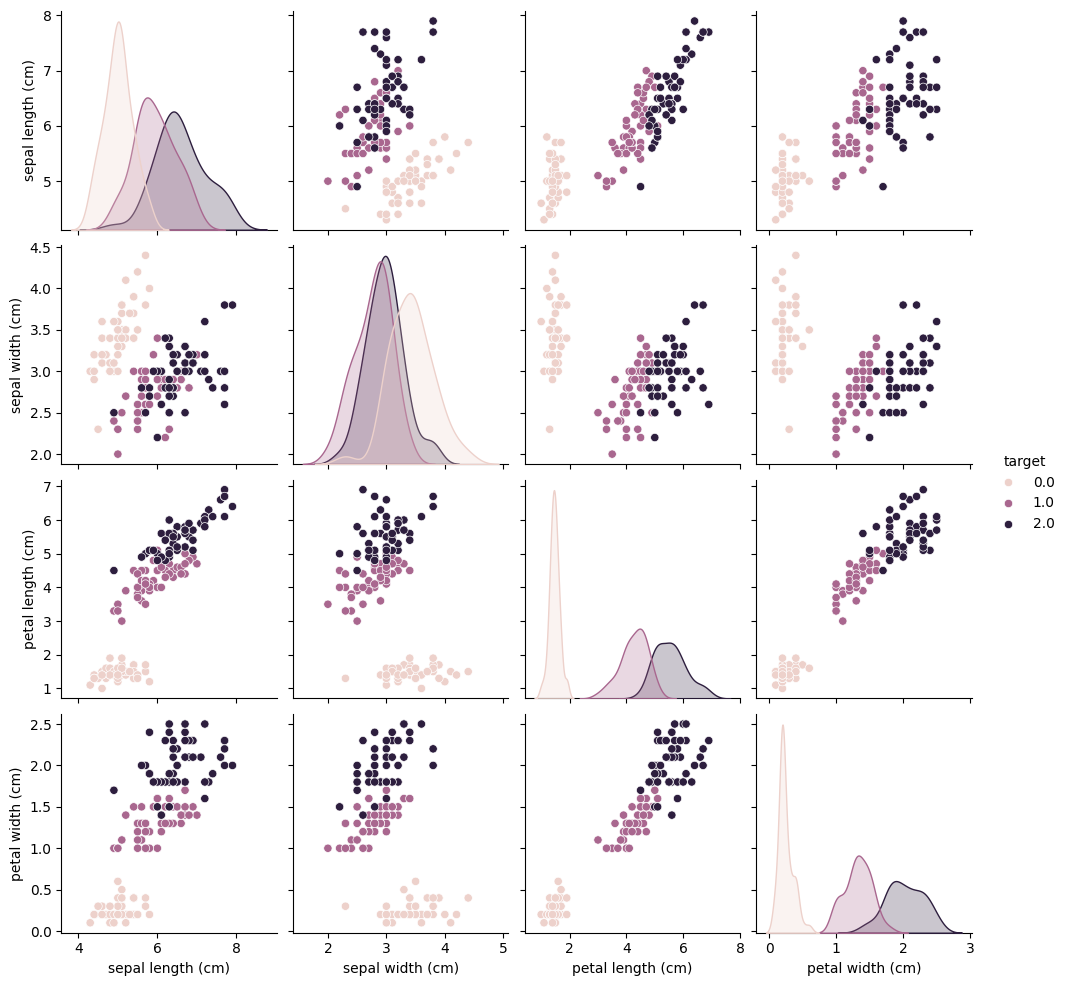

In [ ]:
sns.pairplot(data=data[data.columns[0:6]], hue='target')
plt.show()

## Heatmap

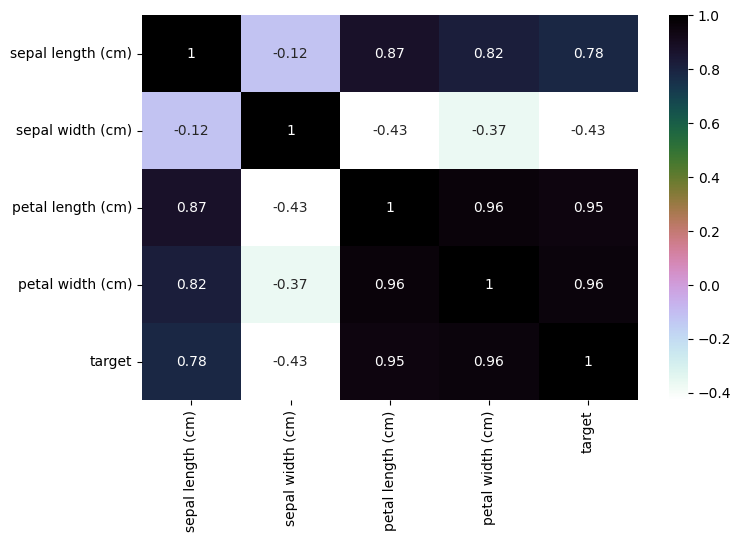

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

#### From the plot, we can say that the Petal Width and Length are highly correlated

#### Now, lets shuffle the data

In [ ]:
data = shuffle(data)

In [ ]:
X=data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
target=data[['target']]
y_true=target.copy()

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
136,6.3,3.4,5.6,2.4
119,6.0,2.2,5.0,1.5
5,5.4,3.9,1.7,0.4
1,4.9,3.0,1.4,0.2
148,6.2,3.4,5.4,2.3
...,...,...,...,...
7,5.0,3.4,1.5,0.2
16,5.4,3.9,1.3,0.4
86,6.7,3.1,4.7,1.5
11,4.8,3.4,1.6,0.2


In [ ]:
target

,target
136,2.0
119,2.0
5,0.0
1,0.0
148,2.0
...,...
7,0.0
16,0.0
86,1.0
11,0.0


### Train the model

In [ ]:
X = StandardScaler().fit_transform(X)
target = LabelBinarizer().fit_transform(target)         # LabelBinarizer  is a powerful tool used to convert categorical labels into binary vectors output in numpy array

In [ ]:
X

array([[ 6.74501145e-01, -5.92373012e-01,  1.04694540e+00,
         1.31719939e+00],
       [-4.16009689e-01, -1.28296331e+00,  1.37546573e-01,
         1.32509732e-01],
       [ 1.03800476e+00,  5.58610819e-01,  1.10378283e+00,
         1.71209594e+00],
       [-2.94841818e-01, -1.31979479e-01,  1.94384000e-01,
         1.32509732e-01],
       [-5.37177559e-01,  7.88807586e-01, -1.28338910e+00,
        -1.05217993e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
        -1.31544430e+00],
       [-1.73673948e-01, -5.92373012e-01,  4.21733708e-01,
         1.32509732e-01],
       [-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.18381211e+00],
       [ 1.40150837e+00,  3.28414053e-01,  5.35408562e-01,
         2.64141916e-01],
       [-9.00681170e-01,  1.70959465e+00, -1.22655167e+00,
        -1.31544430e+00],
       [-1.87002413e+00, -1.31979479e-01, -1.51073881e+00,
        -1.44707648e+00],
       [-1.02184904e+00,  3.28414053e-01, -1.45390138e+00,
      

In [ ]:
target

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0,

#### Dividing the Data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 101)

#### Model

In [ ]:
model = Sequential()
model.add(Dense( 12, input_dim=4, activation = 'relu'))
model.add(Dense( units = 15, activation= 'relu'))
model.add(Dense( units = 8, activation= 'relu'))
model.add(Dense( units = 10, activation= 'relu'))
model.add(Dense( units = 3, activation= 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 120, validation_data = (x_test, y_test))

Epoch 1/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5448 - loss: 1.0874 - val_accuracy: 0.4667 - val_loss: 1.0910
Epoch 2/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5117 - loss: 1.0774 - val_accuracy: 0.4667 - val_loss: 1.0817
Epoch 3/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5167 - loss: 1.0680 - val_accuracy: 0.4333 - val_loss: 1.0736
Epoch 4/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5015 - loss: 1.0590 - val_accuracy: 0.5000 - val_loss: 1.0653
Epoch 5/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5771 - loss: 1.0449 - val_accuracy: 0.5000 - val_loss: 1.0578
Epoch 6/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5465 - loss: 1.0406 - val_accuracy: 0.6000 - val_loss: 1.0501
Epoch 7/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6404 - loss: 1.0277 - val_accuracy: 0.5333 - val_loss: 1.0423
Epoch 8/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5842 - loss: 1.0223 - val_accuracy: 0.5333 - val_loss:

#### Predicting Targets for test data from the model trained on train data

In [ ]:
y_pred_probs = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


In [ ]:
y_pred = np.argmax(y_pred_probs, axis=-1)
y_pred

array([0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 1, 2, 2, 2, 0])

#### Model Preformance

In [ ]:
y_test

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
y_test=np.argmax(y_test, axis=1)

In [ ]:
y_test

array([0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2,
       1, 0, 1, 1, 2, 2, 2, 0])

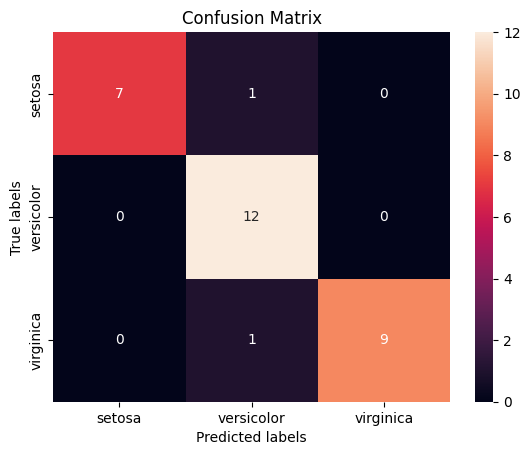

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test.tolist(), y_pred.tolist())

import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']); ax.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']);

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision_recall_fscore_support(y_test.tolist(), y_pred.tolist(), average='macro')

(0.9523809523809524, 0.9249999999999999, 0.9345928924876293, None)

### Plotting Accuracy and Loss

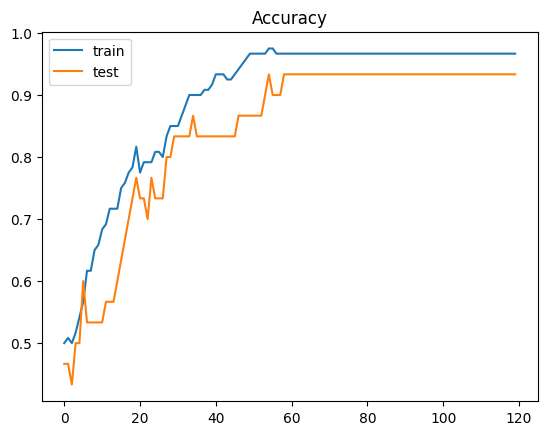

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

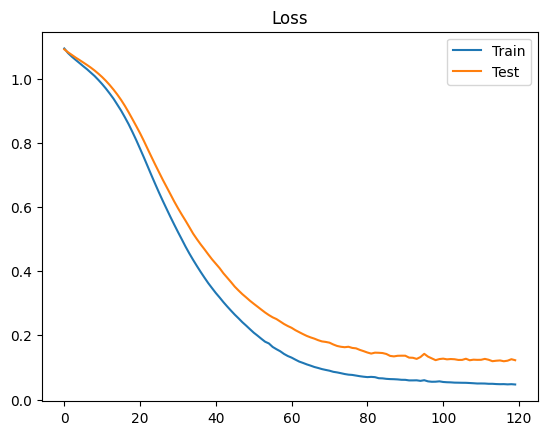

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()